## Week-11: Write a program to predict data on Insurance Fraud Detection based on past historical data.

### In order to predict Fraud Insurance claims, we have took Car Insurance fraud dataset to find Car Insurance fraud claims.

### Step-1: Mounting google drive.

In [162]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [163]:
import os
print(os.getcwd())

/content


### Step-2: Import libraries and Dataset.

In [164]:
import numpy as np

In [165]:
import pandas as pd

In [166]:
import matplotlib.pyplot as plt

In [167]:
df=pd.read_excel('/content/gdrive/My Drive/Machine Learning lab/Dataset.xlsx')

In [168]:
df.shape

(11565, 34)

In [169]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [170]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [171]:
df['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Mar', 'Aug', 'Apr', 'Jul',
       'May', 'Sep', 'Nov'], dtype=object)

In [172]:
df['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Dec', 'Mar', 'Aug', 'May', 'Apr',
       'Jun', 'Sep', 'Oct', 0], dtype=object)

In [173]:
df['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [174]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [175]:
df['PolicyType'].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision',
       'Utility - Liability', 'Utility - All Perils',
       'Sport - All Perils'], dtype=object)

In [176]:
df['FraudFound_P'].unique()

array([0, 1])

In [177]:
df['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [178]:

df['AgentType'].unique()

array(['External', 'Internal'], dtype=object)

In [179]:
df.dtypes

Month                    object
WeekOfMonth               int64
DayOfWeek                object
Make                     object
AccidentArea             object
DayOfWeekClaimed         object
MonthClaimed             object
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus            object
Age                     float64
Fault                    object
PolicyType               object
VehicleCategory          object
VehiclePrice             object
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating            float64
Days_Policy_Accident     object
Days_Policy_Claim        object
PastNumberOfClaims       object
AgeOfVehicle             object
AgeOfPolicyHolder        object
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments      object
AddressChange_Claim      object
NumberOfCars             object
Year    

### Step-3: Data analysis.

In [180]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [181]:
df.drop(columns=['Age','ClaimSize','WeekOfMonth','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','WeekOfMonthClaimed','MaritalStatus','VehicleCategory','RepNumber','Deductible','DriverRating','Days_Policy_Accident','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AgentType','NumberOfSuppliments','AddressChange_Claim','BasePolicy'],inplace=True)

In [182]:
df

,Month,MonthClaimed,Sex,Fault,PolicyType,VehiclePrice,FraudFound_P,PolicyNumber,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfCars,Year
0,Dec,Jan,Female,Policy Holder,Sport - Liability,more than 69000,0,1,more than 30,none,3 years,3 to 4,1994
1,Jan,Jan,Male,Policy Holder,Sport - Collision,more than 69000,0,2,more than 30,none,6 years,1 vehicle,1994
2,Oct,Nov,Male,Policy Holder,Sport - Collision,more than 69000,0,3,more than 30,1,7 years,1 vehicle,1994
3,Jun,Jul,Male,Third Party,Sedan - Liability,20000 to 29000,0,4,more than 30,1,more than 7,1 vehicle,1994
4,Feb,Feb,Male,Third Party,Sport - Collision,more than 69000,0,7,more than 30,1,7 years,1 vehicle,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11560,Nov,Nov,Male,Policy Holder,Sedan - Liability,20000 to 29000,0,15414,more than 30,1,7 years,1 vehicle,1996
11561,Nov,Nov,Male,Third Party,Sedan - Collision,30000 to 39000,0,15415,more than 30,none,7 years,2 vehicles,1996
11562,Nov,Nov,Male,Policy Holder,Sedan - Collision,20000 to 29000,1,15416,more than 30,2 to 4,6 years,1 vehicle,1996
11563,Dec,Dec,Female,Third Party,Sedan - All Perils,20000 to 29000,0,15419,more than 30,none,2 years,1 vehicle,1996


In [183]:
df['Month'].value_counts()

Jan    1056
May    1028
Mar     995
Jun     981
Oct     973
Dec     970
Apr     959
Sep     952
Feb     949
Jul     938
Nov     913
Aug     851
Name: Month, dtype: int64

In [184]:
df['MonthClaimed'].value_counts()

Jan    1084
May    1038
Mar    1005
Oct     995
Nov     973
Apr     970
Jun     967
Feb     955
Sep     944
Jul     908
Dec     879
Aug     846
0         1
Name: MonthClaimed, dtype: int64

In [185]:
df['Sex'].value_counts()

Male      9768
Female    1797
Name: Sex, dtype: int64

In [186]:

df['Fault'].value_counts()

Policy Holder    8394
Third Party      3171
Name: Fault, dtype: int64

In [187]:
df['PolicyType'].value_counts()

Sedan - Collision       4186
Sedan - Liability       3742
Sedan - All Perils      3067
Sport - Collision        262
Utility - All Perils     251
Utility - Collision       24
Sport - All Perils        19
Utility - Liability       13
Sport - Liability          1
Name: PolicyType, dtype: int64

In [188]:
df['VehiclePrice'].value_counts()

20000 to 29000     6112
30000 to 39000     2640
more than 69000    1605
less than 20000     800
40000 to 59000      349
60000 to 69000       59
Name: VehiclePrice, dtype: int64

In [189]:
df['Days_Policy_Claim'].value_counts()

more than 30    11504
15 to 30           47
8 to 15            13
none                1
Name: Days_Policy_Claim, dtype: int64

In [190]:
df['PastNumberOfClaims'].value_counts()

2 to 4         4140
none           3286
1              2675
more than 4    1464
Name: PastNumberOfClaims, dtype: int64

In [191]:
df['AgeOfVehicle'].value_counts()

7 years        4388
more than 7    2993
6 years        2581
5 years         990
new             285
4 years         176
3 years         100
2 years          52
Name: AgeOfVehicle, dtype: int64

In [192]:
df['NumberOfCars'].value_counts()

1 vehicle      10698
2 vehicles       559
3 to 4           288
5 to 8            19
more than 8        1
Name: NumberOfCars, dtype: int64

### Encoding the Categorical variables.

In [193]:
from sklearn.preprocessing import LabelEncoder

In [194]:
le=LabelEncoder()

In [195]:
df['NumberOfCars']=le.fit_transform(df['NumberOfCars'])

In [196]:
df['AgeOfVehicle']=le.fit_transform(df['AgeOfVehicle'])

In [197]:
Past_Claims={'PastNumberOfClaims':{'2 to 4':2,'none':0,'1':1,'more than 4':3}}

In [198]:
df['PastNumberOfClaims'].value_counts()

2 to 4         4140
none           3286
1              2675
more than 4    1464
Name: PastNumberOfClaims, dtype: int64

In [199]:
df.replace(Past_Claims,inplace=True)

In [200]:
df['Month']=le.fit_transform(df['Month'])

In [201]:
df['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Dec', 'Mar', 'Aug', 'May', 'Apr',
       'Jun', 'Sep', 'Oct', 0], dtype=object)

In [202]:
monthclaimed={'MonthClaimed':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}}

In [203]:
df.replace(monthclaimed,inplace=True)

In [204]:
df['MonthClaimed'].unique()

array([ 1, 11,  7,  2, 12,  3,  8,  5,  4,  6,  9, 10,  0])

In [205]:
df['Sex']=le.fit_transform(df['Sex'])

In [206]:
df['Fault']=le.fit_transform(df['Fault'])

In [207]:
df['PolicyType']=le.fit_transform(df['PolicyType'])

In [208]:
df['VehiclePrice']=le.fit_transform(df['VehiclePrice'])

In [209]:
df['Days_Policy_Claim']=le.fit_transform(df['Days_Policy_Claim'])

In [210]:
df

,Month,MonthClaimed,Sex,Fault,PolicyType,VehiclePrice,FraudFound_P,PolicyNumber,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfCars,Year
0,2,1,0,0,5,5,0,1,2,0,1,2,1994
1,4,1,1,0,4,5,0,2,2,0,4,0,1994
2,10,11,1,0,4,5,0,3,2,1,5,0,1994
3,6,7,1,1,2,0,0,4,2,1,6,0,1994
4,3,2,1,1,4,5,0,7,2,1,5,0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11560,9,11,1,0,2,0,0,15414,2,1,5,0,1996
11561,9,11,1,1,1,1,0,15415,2,0,5,1,1996
11562,9,11,1,0,1,0,1,15416,2,2,4,0,1996
11563,2,12,0,1,0,0,0,15419,2,0,0,0,1996


In [211]:
df.isnull().sum()

Month                 0
MonthClaimed          0
Sex                   0
Fault                 0
PolicyType            0
VehiclePrice          0
FraudFound_P          0
PolicyNumber          0
Days_Policy_Claim     0
PastNumberOfClaims    0
AgeOfVehicle          0
NumberOfCars          0
Year                  0
dtype: int64

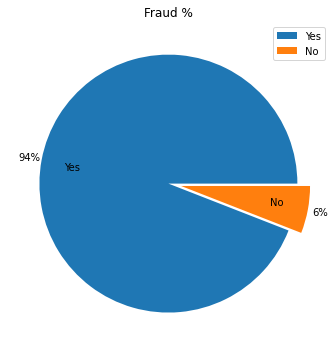

In [212]:
plt.figure(figsize=(12,5))
plt.pie(x=df['FraudFound_P'].value_counts(),autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.7,explode=[0,0.1],labels=['Yes','No'])
plt.title('Fraud %')
plt.legend()
plt.tight_layout()
plt.show()

In [213]:
df['FraudFound_P'].value_counts()

0    10880
1      685
Name: FraudFound_P, dtype: int64

In [214]:
x=df.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12]].values

In [215]:
y=df.iloc[:,6].values

In [216]:
x

array([[   2,    1,    0, ...,    1,    2, 1994],
       [   4,    1,    1, ...,    4,    0, 1994],
       [  10,   11,    1, ...,    5,    0, 1994],
       ...,
       [   9,   11,    1, ...,    4,    0, 1996],
       [   2,   12,    0, ...,    0,    0, 1996],
       [   2,   12,    1, ...,    3,    0, 1996]])

In [217]:
y

array([0, 0, 0, ..., 1, 0, 1])

### Step-4: Splitting the data into train and test sets.

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [220]:
x_train

array([[   4,    1,    1, ...,    6,    0, 1996],
       [   7,    3,    0, ...,    0,    0, 1994],
       [  10,   10,    1, ...,    6,    0, 1995],
       ...,
       [   2,   12,    1, ...,    5,    2, 1995],
       [  10,   10,    0, ...,    5,    0, 1994],
       [   2,   12,    1, ...,    5,    0, 1995]])

In [221]:
x_test

array([[   6,    6,    1, ...,    4,    0, 1996],
       [   1,    8,    1, ...,    6,    0, 1996],
       [  11,    9,    1, ...,    5,    1, 1995],
       ...,
       [   3,    3,    1, ...,    4,    0, 1995],
       [   0,    4,    1, ...,    6,    0, 1994],
       [   5,    8,    1, ...,    5,    0, 1996]])

In [222]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [223]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

### Step-5: Building prediction model using Random Forest Classifier.

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rfc=RandomForestClassifier()

In [237]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [238]:
y_pred=rfc.predict(x_test)

In [239]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [240]:
rfc.predict([[9,11,1,0,1,0,15416,2,2,4,0,1996]])

array([1])

### Step-6: Calculating accuracy.

In [241]:
from sklearn.metrics import accuracy_score

In [243]:
a=accuracy_score(y_pred,y_test)

In [244]:
a

0.946058091286307